## Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## DataFrame

In [2]:
df1 = pd.read_excel('data1.xlsx')
display(df1.head(2) )
df2 = pd.read_excel('data2.xlsx')
display(df2.head(2) )

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1
0,SOAKIMP12A8C130995,1,tejaswini wagh,83789,348,“ You'll never find peace of mind until you li...,https://www.instagram.com/waghtejaswini/,9.9,The Cove,Thicker Than Water,Jack Johnson,0,-7.719191,2.180809,3,1827,16445,3d
1,SOAKIMP12A8C130995,1,Shounak Nayak,7151,505,UK/India All posts my own unless stated. Email:,https://www.instagram.com/shounaknayak/,3.4,The Cove,Thicker Than Water,Jack Johnson,0,1.337458,4.737458,1,161,967,1d


,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1
0,SOBBGTM12A6D4F6199,9,ek taro sathi,86255,"1,636","BEAUTY EDUCATOR💄 📍New Delhi, India 🌏 Works Glo...",https://www.instagram.com/1_taro_sathi/,1.7,A Girl Like You,Empire Records,Edwyn Collins,1994,1.840150,3.540150,15,21811,130866,2w
1,SOBBGTM12A6D4F6199,1,ziyu🔵,21070,82,👑OffiCial Account👑 .....KTM.....🏍️...🤙 Al ShaR...,https://www.instagram.com/hotty_ziya/,0.2,A Girl Like You,Empire Records,Edwyn Collins,1994,0.328574,0.528574,12,890,3563,1w


In [3]:
#append two dataset

df = df1.append(df2, ignore_index=False)
df.tail(2)

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1
43803,SOOAAQL12B0B80B6D1,23,Treat Your Pets,1294,15,🐶| Do you love your pets? 🐱| Cause we sure lov...,https://www.instagram.com/treatyourpetsnet/,21.4,Borders,Dreams,The Whitest Boy Alive,2006,-13.020096,8.379904,5,258,1549,5d
43804,SOSSZPW12A8C13843D,20,Kashika Kapur Makeupartist,49130,"1,921",Dreamer of making this world a better place🙏🏻 ...,https://www.instagram.com/kashikakapurmua/,2.9,Figures,Dreams,The Whitest Boy Alive,2006,-2.334510,0.565490,1,92,833,1d


In [4]:
#remove duplicates based on song, url columns

df = df.drop_duplicates(subset = ['Song', 'URL'], keep = 'first').reset_index(drop = True)
df.tail(2)

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1
99538,SOOAAQL12B0B80B6D1,23,Treat Your Pets,1294,15,🐶| Do you love your pets? 🐱| Cause we sure lov...,https://www.instagram.com/treatyourpetsnet/,21.4,Borders,Dreams,The Whitest Boy Alive,2006,-13.020096,8.379904,5,258,1549,5d
99539,SOSSZPW12A8C13843D,20,Kashika Kapur Makeupartist,49130,"1,921",Dreamer of making this world a better place🙏🏻 ...,https://www.instagram.com/kashikakapurmua/,2.9,Figures,Dreams,The Whitest Boy Alive,2006,-2.334510,0.565490,1,92,833,1d


## Exploratory Data Analysis

* remove such users whose overall posts are less than use_count of songs as reels

In [5]:
#removing punctuation

import string
punc = string.punctuation
def remove_punc(x):
    s = ""
    for l in x:
        if l not in punc:
            s+=l
    return s

df['Posts'] = df['Posts'].apply(lambda x:remove_punc(x) )

In [6]:
#converting type from str to int
def intify(x):
    return int(x)

df['use_count'] = df['use_count'].apply(lambda x:intify(x) )
df['Posts'] = df['Posts'].apply(lambda x:intify(x) )

In [7]:
#remove such users whose overall posts are less than use_count of songs as reels
#ie . they are invalid

df = df[df['use_count']<df['Posts'] ]

* remove unexceptionally high Engagement Rate; which could not be real

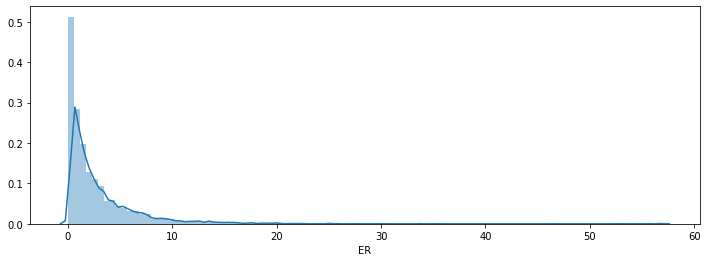

In [8]:
#clearly most of data is not normally distributed
#most of the users have engagement rate<15

plt.figure(figsize=(12, 4))
sns.distplot(df['ER'], bins=100)

In [9]:
#clearly users with er>12 are outliers we'll remove them
#in practical we won't be having such high engagement rate

df = df[df['ER']<=12]

* check on number of followers

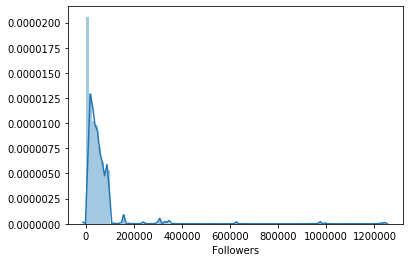

In [10]:
sns.distplot(df['Followers'], bins=100)
#okay! so the outliers are celebrities that are not nano/micro influencer, well accepted. We can't remove them

* check on number of posts

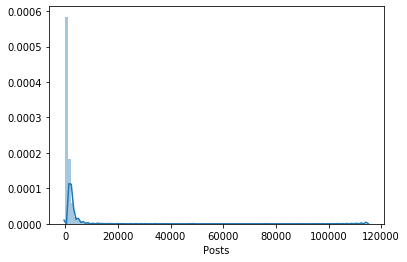

In [11]:
pf = df.groupby('URL').mean()['Posts']
sns.distplot(pf, bins=100)

In [12]:
pf.max()

114654.0

In [14]:
zf = df[df['Posts']>15000]
zf.Posts.max()

114654

In [15]:
zf[zf['Followers']==1242555]


#after manually verifying account of bewakoof it was clearly got to know that its total post on instagram are not more than 13k

#even priyanka chopra does not have post more 4k

#so it is safe assumption to remove those post>10k as the ill/irregular data

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1
6169,SOEWTBE12A58A7E7C2,3,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Strawberry Swing,Viva La Vida - Prospekt's March Edition,Coldplay,2008,4.454225,5.454225,15,677717,2710869,2w
12948,SOEAVMU12AB017E234,2,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Year of the Suckerpunch,Show Your Colors,Amoral,2009,0.226801,1.226801,5,42343,211717,5d
21734,SOVIUZY12AF72AB1D2,1,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Only In Dreams,Weezer,Weezer,1994,1.876811,2.876811,13,258165,1290826,1w
23190,SOKBRAQ12A6D4F8FEC,13,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Stripper Vicar,Legacy: The Best Of Mansun,Mansun,1996,0.833192,1.833192,15,227784,911136,2w
27767,SOTEGWG12AB01897AC,25,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Forever,Relapse: Refill,Drake / Kanye West / Lil Wayne / Eminem,0,0.131273,1.131273,13,121824,487298,1w
27850,SOUJVIT12A8C1451C1,2,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Savior,Appeal To Reason,Rise Against,2008,1.456814,2.456814,25,317992,2225946,3w
35551,SOLPVAQ12AB017EB35,1,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,All Men Are Liars,Quiet Please... The New Best Of Nick Lowe,Nick Lowe,0,3.209125,4.209125,9,313804,1255216,1w
37691,SOPCMUQ12A67ADA1C3,1,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Spirits In The Material World,Every Breath You Take : The Classics,The Police,1981,-0.555404,0.444596,4,12276,61381,4d
39097,SOURBIU12AC3DF683C,3,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Salty Dog,Live at the Greek Theatre,Flogging Molly,1999,3.803263,4.803263,19,629989,3149946,2w
40511,SOYEKNS12AF729EE18,2,Bewakoof.com,1242555,28979,Your digital BFF! #bollywood #fashion #lifesty...,https://www.instagram.com/bewakoofofficial/,1.0,Century,Kaleidoscope,Tiësto feat. Calvin Harris,2009,4.974721,5.974721,11,272210,2449893,1w


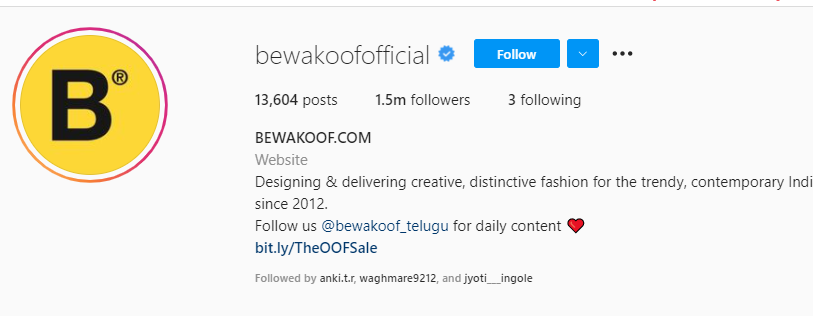

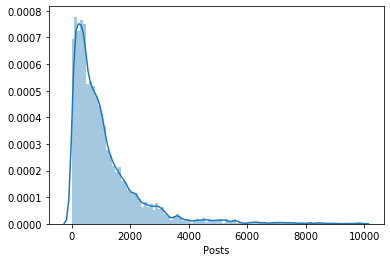

In [16]:
df = df[df['Posts']<10000]
sns.distplot(df['Posts'], bins=100)

* check on time

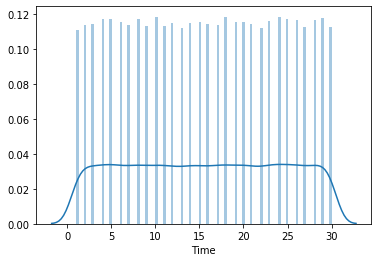

In [17]:
sns.distplot(df['Time'], bins=100)
#no issues uniformly distributed

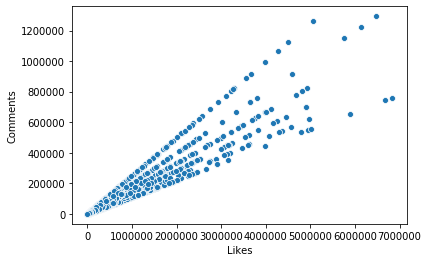

In [19]:
sns.scatterplot(x='Likes', y='Comments', data=df)
#have relationship, perfect lines since our data is dummy

In [21]:
df.reset_index(drop=True)

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1
0,SOAKIMP12A8C130995,1,tejaswini wagh,83789,348,“ You'll never find peace of mind until you li...,https://www.instagram.com/waghtejaswini/,9.9,The Cove,Thicker Than Water,Jack Johnson,0,-7.719191,2.180809,3,1827,16445,3d
1,SOAKIMP12A8C130995,1,Shounak Nayak,7151,505,UK/India All posts my own unless stated. Email:,https://www.instagram.com/shounaknayak/,3.4,The Cove,Thicker Than Water,Jack Johnson,0,1.337458,4.737458,1,161,967,1d
2,SOAKIMP12A8C130995,3,JD Institute of Fashion,16047,3120,"Empowering creative minds since 1988, JD insti...",https://www.instagram.com/jdinstitute/,0.5,The Cove,Thicker Than Water,Jack Johnson,0,0.130806,0.630806,30,1012,9110,4w
3,SOAKIMP12A8C130995,1,None,14358,263,↠ 25+ countries ~ iPhone 11 Pro Max & Nikon D9...,https://www.instagram.com/irenethetraveller/,3.9,The Cove,Thicker Than Water,Jack Johnson,0,-3.726072,0.173928,7,58,524,1w
4,SOAKIMP12A8C130995,6,Sunny Dhingra,1434,213,punjabi Music🎧🎼👌🏻 photography wish me on 30 Nov.,https://www.instagram.com/sunny.dhingra.10/,0.0,The Cove,Thicker Than Water,Jack Johnson,0,3.678107,3.678107,8,140,1265,1w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95568,SOMTZOO12A58A7BF5F,3,Anviti Shiromany,24465,1534,👩🏻‍💼Lawyer ✈️Travel enthusiast 🎖Zomato verifie...,https://www.instagram.com/lady.epicurean/,0.2,Many Ghosts,Set 'Em Wild_ Set 'Em Free,Akron/Family,2009,3.754875,3.954875,19,12255,49023,2w
95569,SOFAONV12A67020E43,2,Anshu Kumar,1024,444,Artist 🔹Delhi ⏺️ College Of Art ⏺️ Sales 🔸#ans...,https://www.instagram.com/anshu_art/,3.9,Slipping Away (2006 Digital Remaster),Go - The Very Best Of Moby,Moby,0,-1.539084,2.360916,18,207,1243,2w
95570,SOQQSZV12AB0183A84,5,Javed Sayed,80064,908,💪 Lifetime Natural Fitness Athlete 🧑🏽‍💻Online ...,https://www.instagram.com/shamszfit/,3.3,What I Wouldn't Do,Bomb In A Birdcage,A Fine Frenzy,2008,-2.475308,0.824692,30,8253,57774,4w
95571,SOGCHYZ12AF72A69EC,2,Riya Deepsi,25955,515,Human being Email for any collaboration or enq...,https://www.instagram.com/riya_d_m/,3.2,That Tree (feat. Kid Cudi),That Tree Featuring Kid Cudi,Snoop Dogg featuring Kid Cudi,2010,-0.050210,3.149790,17,7721,38605,2w


In [25]:
def fn(x):
    s = ""
    if x<7:
        s += str(x)
        s += "d"
    else:
        s += str(round(x/7) )
        s += "w"
    return s
df['Time2'] = df['Time'].apply(lambda x:fn(x) )

In [26]:
df

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Time,Comments,Likes,Time1,Time2
0,SOAKIMP12A8C130995,1,tejaswini wagh,83789,348,“ You'll never find peace of mind until you li...,https://www.instagram.com/waghtejaswini/,9.9,The Cove,Thicker Than Water,Jack Johnson,0,-7.719191,2.180809,3,1827,16445,3d,3d
1,SOAKIMP12A8C130995,1,Shounak Nayak,7151,505,UK/India All posts my own unless stated. Email:,https://www.instagram.com/shounaknayak/,3.4,The Cove,Thicker Than Water,Jack Johnson,0,1.337458,4.737458,1,161,967,1d,1d
2,SOAKIMP12A8C130995,3,JD Institute of Fashion,16047,3120,"Empowering creative minds since 1988, JD insti...",https://www.instagram.com/jdinstitute/,0.5,The Cove,Thicker Than Water,Jack Johnson,0,0.130806,0.630806,30,1012,9110,4w,4w
3,SOAKIMP12A8C130995,1,None,14358,263,↠ 25+ countries ~ iPhone 11 Pro Max & Nikon D9...,https://www.instagram.com/irenethetraveller/,3.9,The Cove,Thicker Than Water,Jack Johnson,0,-3.726072,0.173928,7,58,524,1w,1w
4,SOAKIMP12A8C130995,6,Sunny Dhingra,1434,213,punjabi Music🎧🎼👌🏻 photography wish me on 30 Nov.,https://www.instagram.com/sunny.dhingra.10/,0.0,The Cove,Thicker Than Water,Jack Johnson,0,3.678107,3.678107,8,140,1265,1w,1w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99534,SOMTZOO12A58A7BF5F,3,Anviti Shiromany,24465,1534,👩🏻‍💼Lawyer ✈️Travel enthusiast 🎖Zomato verifie...,https://www.instagram.com/lady.epicurean/,0.2,Many Ghosts,Set 'Em Wild_ Set 'Em Free,Akron/Family,2009,3.754875,3.954875,19,12255,49023,2w,3w
99535,SOFAONV12A67020E43,2,Anshu Kumar,1024,444,Artist 🔹Delhi ⏺️ College Of Art ⏺️ Sales 🔸#ans...,https://www.instagram.com/anshu_art/,3.9,Slipping Away (2006 Digital Remaster),Go - The Very Best Of Moby,Moby,0,-1.539084,2.360916,18,207,1243,2w,3w
99536,SOQQSZV12AB0183A84,5,Javed Sayed,80064,908,💪 Lifetime Natural Fitness Athlete 🧑🏽‍💻Online ...,https://www.instagram.com/shamszfit/,3.3,What I Wouldn't Do,Bomb In A Birdcage,A Fine Frenzy,2008,-2.475308,0.824692,30,8253,57774,4w,4w
99537,SOGCHYZ12AF72A69EC,2,Riya Deepsi,25955,515,Human being Email for any collaboration or enq...,https://www.instagram.com/riya_d_m/,3.2,That Tree (feat. Kid Cudi),That Tree Featuring Kid Cudi,Snoop Dogg featuring Kid Cudi,2010,-0.050210,3.149790,17,7721,38605,2w,2w


* check on use_count

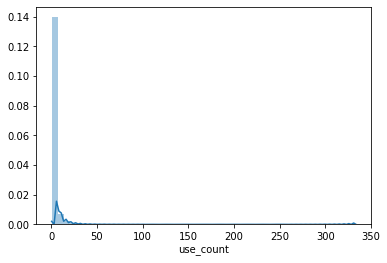

In [43]:
sns.distplot(df['use_count'])

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Comments,Likes,Time
10,SOBBMDR12A8C13253B,66,U T P A L K D A S,7805,1808,Mis medicinas a disposición. — Yoga. — Masaje....,https://www.instagram.com/utpal_k_das/,0.04,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,4.341634,4.381634,1282,8977,1w
155,SODXRTY12AB0180F3B,56,shopneez.com,31470,2530,Supply Brilliant & Fine Jewelry to satisfy eve...,https://www.instagram.com/shopneez/,0.00,Paper Gangsta,The Fame Monster,Lady GaGa,2008,3.638362,3.638362,2385,16697,5d
431,SOFRQTD12A81C233C0,42,Ritika Bharwani,21726,4570,Custom • Occasion • Cocktail • Bridal Contempo...,https://www.instagram.com/ritikabharwani_offic...,0.20,Sehr kosmisch,Musik von Harmonia,Harmonia,0,4.200700,4.400700,637,2549,1d
689,SOMGIYR12AB0187973,88,Sreelakshmi Sreekumar,96467,1187,𝘜𝘱𝘥𝘢𝘵𝘪𝘯𝘨....,https://www.instagram.com/sreelakshmi_sreekumar/,1.30,Behind The Sea [Live In Chicago],Live In Chicago,Panic At The Disco,0,0.694271,1.994271,21375,171005,4w
1081,SOWSPUS12AC468BEE3,39,Bhansali Art & Craft,1896,1788,Established in Handicraft Since 2014 #Wooden #...,https://www.instagram.com/bhansaliartcraft/,0.70,Bigger Isn't Better,Born on the Wrong Planet,The String Cheese Incident,1997,2.299516,2.999516,568,4549,4w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94452,SOSJLGH128A6A731D4,36,DJ HK,240037,139,🇵🇹 DJ & Producer 🌐 Bookings & Enquiries,https://www.instagram.com/djhk_official/,0.90,There You'll Be (Album Version),Chick Flicks,Faith Hill,2002,4.182224,5.082224,13554,67773,2d
94712,SOGHSMH12A8C137927,61,Sanjoy Singh Sandhu,17460,153,➖Actor || Fitness athlete || Model ➖here to #h...,https://www.instagram.com/sanjoysandhu/,1.20,Skyway Avenue,We The Kings,We The Kings,2007,2.477993,3.677993,428,1712,1d
95018,SOBCMUG12AB017D50A,58,Suvrat Sehgal,5401,3051,"“When life is unbearably hard, the easiest way...",https://www.instagram.com/suv.sehgal/,4.70,Move Shake Drop Remix,Category 6,DJ Laz,0,2.871454,7.571454,3271,13085,2w
95073,SOUBMUR12A8C134787,74,Ankita Shinde,7382,1040,Montreal based painter Email:,https://www.instagram.com/ankitanshinde/,1.70,Morning Train (Nine to Five),Greatest Hits,Sheena Easton,1981,1.847532,3.547532,545,3819,5d


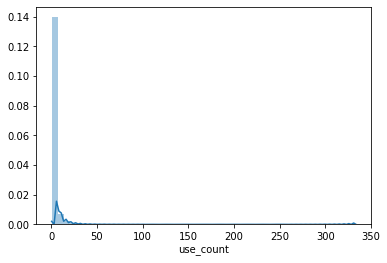

In [42]:
df[df['use_count']>30]  

#only 612 users so we can drop them
#it is very that a user keep posting a reel more than twice on a same song, that is for whole month

In [44]:
df = df[df['use_count']<30]

* drop unneccessary columns

In [28]:
df = df.drop(columns=['Time1', 'Time'])
df = df.rename(columns = {'Time2':'Time'})

In [45]:
df = df.reset_index(drop=True)
df.tail(2)

,Song,use_count,Name,Followers,Posts,Bio,URL,ER,title,release,artist_name,year,Delta,Curr_ER,Comments,Likes,Time
94904,SOGCHYZ12AF72A69EC,2,Riya Deepsi,25955,515,Human being Email for any collaboration or enq...,https://www.instagram.com/riya_d_m/,3.2,That Tree (feat. Kid Cudi),That Tree Featuring Kid Cudi,Snoop Dogg featuring Kid Cudi,2010,-0.05021,3.14979,7721,38605,2w
94905,SOSSZPW12A8C13843D,20,Kashika Kapur Makeupartist,49130,1921,Dreamer of making this world a better place🙏🏻 ...,https://www.instagram.com/kashikakapurmua/,2.9,Figures,Dreams,The Whitest Boy Alive,2006,-2.33451,0.56549,92,833,1d


In [46]:
df1 = df[:50000]
df2 = df[50000:]

* saving the data

In [47]:
df1.to_excel('cleaned_data1.xlsx', index=False)
df2.to_excel('cleaned_data2.xlsx', index=False)